<a href="https://colab.research.google.com/github/Waye/CSC420-CourseWork-fall2019/blob/master/Tutorial/CSC420_2019_Tutorial_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# install OpenCV
!pip install opencv-python

# the usual ...
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [0]:
# read an image (make sure CavePainting.jpg is in the main folder in your Google Drive)
img = cv2.imread('/content/drive/My Drive/image/csc420/Corners.jpg') # READS IN NUMPY ARRAY
#img = cv2.imread('/content/drive/My Drive/image/csc420/Window2.jpg') # READS IN NUMPY ARRAY

In [0]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

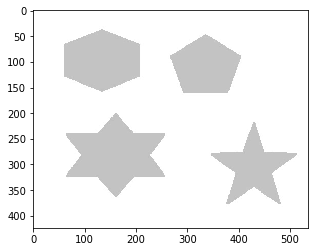

In [9]:
plt.imshow(img)

In [0]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),7)
Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0d4c3644e0>,
 <matplotlib.image.AxesImage at 0x7f0d4c2c22b0>)

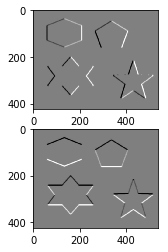

In [12]:
plt.subplot(2,1,1), plt.imshow(Ix,cmap = 'gray')
plt.subplot(2,1,2), plt.imshow(Iy,cmap = 'gray')


In [0]:
IxIy = np.multiply(Ix, Iy)
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)

In [0]:
Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10) 
Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10) 
IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10) 

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0d4c2a3940>,
 <matplotlib.image.AxesImage at 0x7f0d4c1f86d8>)

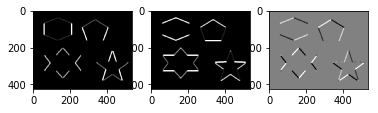

In [17]:
plt.subplot(1,3,1), plt.imshow(Ix2_blur,cmap = 'gray')
plt.subplot(1,3,2), plt.imshow(Iy2_blur,cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(IxIy_blur,cmap = 'gray')


In [0]:
det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
trace = Ix2_blur + Iy2_blur

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0d4c254160>,
 <matplotlib.image.AxesImage at 0x7f0d4c198a90>)

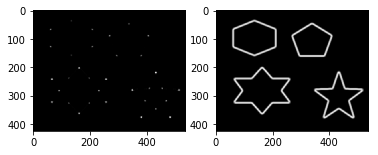

In [19]:
plt.subplot(1,2,1), plt.imshow(det,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(trace,cmap = 'gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f0d4f526630>,
 (-0.5, 535.5, 423.5, -0.5))

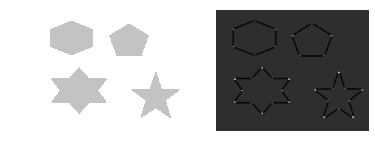

In [20]:
R = det - 0.05 * np.multiply(trace,trace)
plt.subplot(1,2,1), plt.imshow(img), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(R,cmap = 'gray'), plt.axis('off')